In [1]:
#General plan for analysis of wine data
#Section 1: Data exploration and cleaning
#Section 2: Data description
#Section 3: User interface
#Section 4: Data analysis
#Section 5: Scope for future analysis

In [2]:
#Import dependencies
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import pymsgbox
import tkinter
from tkinter import messagebox




In [3]:
#Read CSV file
df_wine = pd.read_csv('wine_150k.csv')
df_wine.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


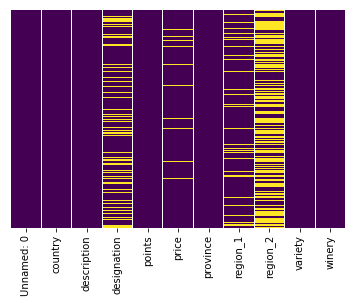

In [4]:
#Section 1: Data exploration and cleaning - Removing null values and columns
#How complete is our data - look at heat map
sns.heatmap(df_wine.isnull(),yticklabels=False, cbar=False, cmap='viridis')
plt.show()

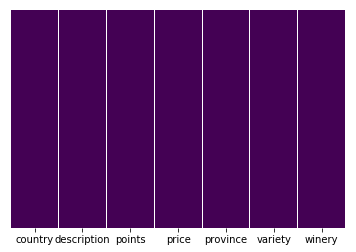

In [5]:
#Section 1: Data exploration and cleaning - Removing null values and columns
#Get rid of columns with a lot of missing data that we are not analyzing for now and rows where price is missing
df_wine_nm=df_wine.drop(['Unnamed: 0','designation','region_1','region_2'],axis=1)
df_wine_nm.dropna(subset=["price"], inplace=True)
#re-check heatmap on clean data
sns.heatmap(df_wine_nm.isnull(),yticklabels=False, cbar=False, cmap='viridis')
plt.show()

              points          price
count  137235.000000  137235.000000
mean       87.787919      33.131482
std         3.221680      36.322536
min        80.000000       4.000000
25%        86.000000      16.000000
50%        88.000000      24.000000
75%        90.000000      40.000000
max       100.000000    2300.000000
----------------------------------------------------
Number of varieties of wine in dataset: 619
Number of countries represented in dataset: 47
----------------------------------------------------
Price and Points scatter plot


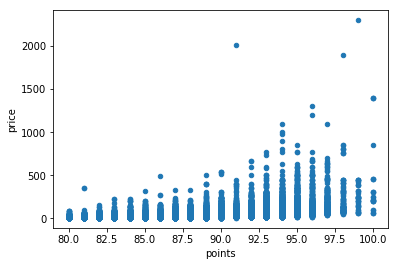

----------------------------------------------------
Set upper limit for price
Here are the percentiles for price:
0.80     45.0
0.90     60.0
0.95     80.0
0.99    150.0
Name: price, dtype: float64
Subset data to 99 percent 
 New data describe
              points          price
count  135893.000000  135893.000000
mean       87.727344      30.776317
std         3.167235      22.146102
min        80.000000       4.000000
25%        86.000000      16.000000
50%        88.000000      24.000000
75%        90.000000      40.000000
max       100.000000     150.000000
----------------------------------------------------
Percentage counts of top 10 countries:
               country
US           45.575768
Italy        13.632550
France       10.455669
Spain         5.925468
Chile         4.230690
Argentina     4.101907
Australia     3.563964
Portugal      3.051778
New Zealand   2.259213
Austria       1.825032
Percentage of data captured looking at top 10 countries: country    94.622042
dtype: f

In [6]:
#Section 1: Data exploration and cleaning :Removing outliers and subsetting data
print(df_wine_nm.describe())
print("----------------------------------------------------")
print(f'Number of varieties of wine in dataset: {len(df_wine_nm["variety"].unique())}')
print(f'Number of countries represented in dataset: {len(df_wine_nm["country"].unique())}')
print("----------------------------------------------------")

#look at data ranges for setting upper limit
print("Price and Points scatter plot")
df_wine_nm.plot.scatter("points","price")
plt.show()
print("----------------------------------------------------")

#Get 95 percentile of price to subset data
print("Set upper limit for price")
print('Here are the percentiles for price:')
print( df_wine_nm["price"].quantile([0.80, 0.90, 0.95, 0.99]))
print("Subset data to 99 percent \n New data describe")
df_ul = df_wine_nm[df_wine_nm["price"] <= df_wine_nm["price"].quantile(0.99)]
print(df_ul.describe())
print("----------------------------------------------------")

# Looking at top 10 countries
print('Percentage counts of top 10 countries:')
s_pct_top10=pd.DataFrame(df_ul['country'].value_counts(normalize=True) * 100).head(10)
print (s_pct_top10)
pct_top10=s_pct_top10.sum()
print(f'Percentage of data captured looking at top 10 countries: {pct_top10}')
print("----------------------------------------------------")

# Looking at top 20 variety of wines among the top 10 countries
print('Percentage counts of top 20 variety:')
df_ul_t20v=df_ul.loc[(True if x in list(s_pct_top10.index) else False for x in df_ul["country"]),:]
s_pct_top20v=pd.DataFrame(df_ul_t20v['variety'].value_counts(normalize=True) * 100).head(20)
print (s_pct_top20v)
pct_top20v=s_pct_top20v.sum()
print(f'Percentage of data captured looking at top 20 wine varieties in top 10 countries: {pct_top20v}')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#inde

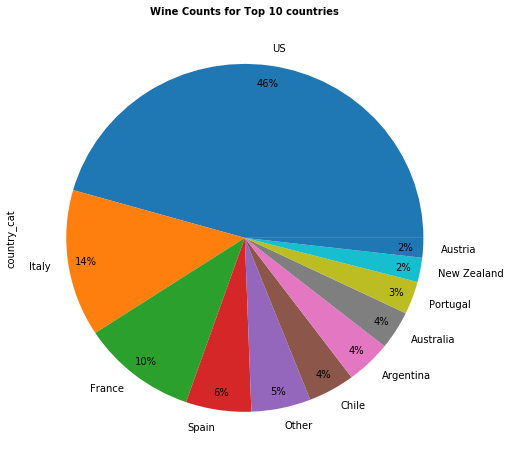

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


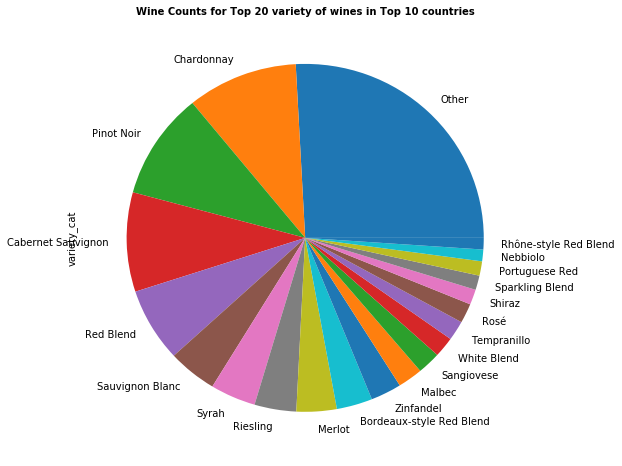

In [7]:
#Section 2: Data description - Binning price and points
#Create points and price category bins in data for analysis
#Point Binning
binspo1 = [80,85,90,95,101] 
labelspo1= ['Bronze','Silver','Gold','Platinum']
labelspo2= ['80-85','85-90','90-95','95-100']
df_ul['category'] = pd.cut(df_ul['points'], bins=binspo1 , labels= labelspo1)
df_ul['points_cat'] = pd.cut(df_ul['points'], bins=binspo1 , labels= labelspo2)

#Price Binning
binspr1=[0,10,20,30,40,50,60,80,100,500]
labelspr1=["<10", "10-20","20-30","30-40","40-50","50-60","60-80","80-100",">100"]
df_ul["price_cat"] = pd.cut(df_ul["price"], binspr1, labels=labelspr1)

#Create 'Other' category for country if not in top 9
df_ul['country_cat'] = df_ul['country'].apply(lambda x: x if x in list(s_pct_top10.index) else 'Other')
plotcc=df_ul['country_cat'].value_counts().plot.pie(figsize=(8,8), autopct='%1.0f%%', pctdistance=0.9)
plt.title('Wine Counts for Top 10 countries', weight='bold', size=10)
plt.show()

#Create 'Other' category for variety if not in top 20
df_ul['variety_cat'] = df_ul['variety'].apply(lambda x: x if x in list(s_pct_top20v.index) else 'Other')
plotvc=df_ul['variety_cat'].value_counts().plot.pie(figsize=(8,8), pctdistance=0.9)
plt.title('Wine Counts for Top 20 variety of wines in Top 10 countries', weight='bold', size=10)
plt.show()

In [8]:
#test = messagebox.askyesno("Confirm Access","Would you like to help us in searching of a better Wine for you?")
test_1 = pymsgbox.confirm(text='Would you like to help us in searching of a better Wine for you?"', title='Choose One', buttons=['Yes', 'No'])
#shop_wine = input("Would you like to help us in searching of a better Wine for you?")
#wishlist = []
if test_1 == "Yes":
    print("Welcome to the House of Wines! Here are some Wines from around the World:")
    country = df_ul['country'].unique()
    print(country)
    pick = input("Please select the Country you are specifically looking for a wine from:")
    print("You selected:", pick)    
else:
    print("No data found!!!")



Welcome to the House of Wines! Here are some Wines from around the World:
['Spain' 'US' 'France' 'Italy' 'New Zealand' 'Bulgaria' 'Argentina'
 'Australia' 'Portugal' 'Israel' 'South Africa' 'Greece' 'Chile' 'Morocco'
 'Romania' 'Germany' 'Canada' 'Moldova' 'Hungary' 'Austria' 'Croatia'
 'Slovenia' nan 'India' 'Turkey' 'Macedonia' 'Lebanon' 'Serbia' 'Uruguay'
 'Switzerland' 'Albania' 'Bosnia and Herzegovina' 'Brazil' 'Cyprus'
 'Lithuania' 'Japan' 'China' 'South Korea' 'Ukraine' 'England' 'Mexico'
 'Georgia' 'Montenegro' 'Luxembourg' 'Slovakia' 'Czech Republic'
 'US-France']
Please select the Country you are specifically looking for a wine from:US
You selected: US


In [9]:
picked_country = df_ul.loc[df_ul["country"] == pick]
#picked_country
user_pick_variety = picked_country['variety_cat'].unique()
print(user_pick_variety)

['Sauvignon Blanc' 'Pinot Noir' 'Chardonnay' 'Rosé' 'Syrah' 'Other'
 'Cabernet Sauvignon' 'Riesling' 'White Blend' 'Sparkling Blend'
 'Zinfandel' 'Rhône-style Red Blend' 'Sangiovese'
 'Bordeaux-style Red Blend' 'Malbec' 'Merlot' 'Red Blend' 'Tempranillo'
 'Nebbiolo' 'Shiraz']


In [10]:
user_choice = input("Please enter variety of Wine:")
print ("User choose:", user_choice)

Please enter variety of Wine:Pinot Noir
User choose: Pinot Noir


In [11]:
user_choice_wine = picked_country[picked_country["variety_cat"]== user_choice]
print(user_choice_wine)

       country                                        description  points  \
3           US  This spent 20 months in 30% new French oak, an...      96   
8           US  This re-named vineyard was formerly bottled as...      95   
9           US  The producer sources from two blocks of the vi...      95   
11          US  From 18-year-old vines, this supple well-balan...      95   
12          US  A standout even in this terrific lineup of 201...      95   
19          US  This fresh and lively medium-bodied wine is be...      95   
24          US  San Jose-based producer Adam Comartin heads 1,...      95   
26          US  Bergström has made a Shea designate since 2003...      94   
27          US  Focused and dense, this intense wine captures ...      94   
28          US  Cranberry, baked rhubarb, anise and crushed sl...      94   
68          US  Big, bold, dark and chewy, this builds upon su...      91   
71          US  This wine draws from a handful of tremendous v...      91   

In [46]:
user_choice_price = input("Please enter price Range of Wine:")
print ("User choose:", user_choice_price)
user_choice_price_1 = user_choice_wine[user_choice_wine["price_cat"]== user_choice_price]
user_choice_price_2 = user_choice_price_1.sort_values(by=["points"], ascending=False).head(20)
user_choice_price_3 = user_choice_price_2.drop(['description','country_cat','variety_cat','price_cat','points_cat'],axis=1)
print(user_choice_price_3)

Please enter price Range of Wine:20-30
User choose: 20-30
       country  points  price    province     variety           winery  \
87736       US      94   28.0  California  Pinot Noir         Pessagno   
52561       US      94   30.0  California  Pinot Noir         Adelaida   
95246       US      93   30.0      Oregon  Pinot Noir       Scott Paul   
21740       US      93   26.0  California  Pinot Noir         Melville   
139452      US      93   25.0  California  Pinot Noir                X   
13141       US      93   21.0  California  Pinot Noir   Felten Cellars   
23846       US      93   30.0  California  Pinot Noir           Dolina   
39845       US      93   30.0  California  Pinot Noir            Diora   
13142       US      93   30.0  California  Pinot Noir             Hahn   
70340       US      93   30.0      Oregon  Pinot Noir         Longplay   
70346       US      93   30.0      Oregon  Pinot Noir       Scott Paul   
42914       US      93   30.0  California  Pinot Noir 

In [13]:
#Section 2: Data description - Pie charts describing data

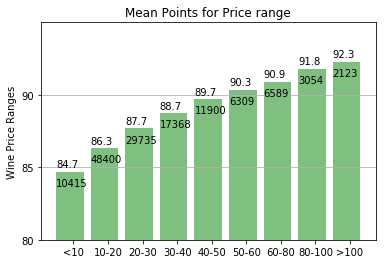

In [14]:
#Section 3: Data Analysis
#Look at price categories of wines and get descriptive stats per range
#Get counts of age groups
df_pr_grp=df_ul.groupby("price_cat")
df_pr_grp_mean=df_pr_grp["points"].mean()
df_pr_grp_ct=df_pr_grp["points"].count()
df_pr_grp_stats=pd.DataFrame(df_pr_grp_mean).merge(pd.DataFrame(df_pr_grp_ct), on="price_cat")\
    .rename(columns={"points_x":"mean", "points_y":"ct"}).reset_index()
df_pr_grp_stats["mean_lab"]=round(df_pr_grp_stats["mean"],1).astype(str)

#Create figure
fig, ax=plt.subplots()
x_axis=np.arange(1,len(df_pr_grp_stats)+1,1)
y_ticks=np.arange(80,95,5)
ax.set_ylim(80,95) 

plt.bar(x_axis, df_pr_grp_stats["mean"], color='g', alpha=0.5, align="edge", width=0.8)

for i, d in enumerate(df_pr_grp_stats["price_cat"]):
        ax.text(x_axis[i], df_pr_grp_stats["mean"][i] +.3, df_pr_grp_stats["mean_lab"][i] ,color='black')
        ax.text(x_axis[i], df_pr_grp_stats["mean"][i] -1, df_pr_grp_stats["ct"][i] ,color='black')
        
#Create tick marks and tick labels
ax.set_xticks(x_axis+0.5)
ax.set_xticklabels(df_pr_grp_stats["price_cat"])
ax.set_yticks(y_ticks)

#Create Title, axes labels and gridlines
plt.title("Mean Points for Price range")
plt.ylabel("Mean of Wine Points")  
plt.ylabel("Wine Price Ranges")  
plt.grid(which='major',axis="y")

In [15]:
#Section 3: Data Analysis
#Which country produces the best quality wines (highest points)
df_cny_grp=df_ul.groupby("country")
df_cny_pts_mean=df_cny_grp["points"].mean()
df_cny_pts_ct=df_cny_grp["points"].count()

df_cnycat_grp=df_ul.groupby("country_cat")
df_cnycat_pts_mean=df_cnycat_grp["points"].mean()

print (df_cny_pts_mean.nlargest(20))
print (df_cnycat_pts_mean.nlargest(11))

country
England         92.750000
Austria         89.185081
Germany         88.464176
France          88.377886
Italy           88.365074
Canada          88.221649
Slovenia        88.172840
Morocco         88.166667
Turkey          88.140000
Portugal        88.138413
Albania         88.000000
US-France       88.000000
Australia       87.811893
US              87.796373
Serbia          87.714286
India           87.625000
New Zealand     87.542671
Switzerland     87.250000
South Africa    87.211444
Hungary         87.168889
Name: points, dtype: float64
country_cat
Austria        89.185081
France         88.377886
Italy          88.365074
Portugal       88.138413
Australia      87.811893
US             87.796373
New Zealand    87.542671
Other          87.309722
Spain          86.555390
Chile          86.283702
Argentina      85.986365
Name: points, dtype: float64


In [16]:
# define method - ratings
# create new column - 'ratings'
# input points bin
# if point between 80-85, assign random rating between 1 and 3
# if point between 85-90, assign random rating between 2 and 4
# if point between 90-95, assign random rating between 4 and 5
# if point between 95-100, assign random rating between 4.5 and 5

file50['rating']= file50['points']
file50

NameError: name 'file50' is not defined

### Correlate, but randomize rating 

In [ ]:
rating_list = []
np.random.seed(9)
for ratings in file50['rating']:
    
    #if(ratings<85):
     #   for price in file50['price']:
    #      w_ratings = price/10 + (np.random.rand() * (4 - 2))
    #        w_ratings=round(w_ratings,1)
    #        rating_list.append(w_ratings)
#print(rating_list)
    
    if (ratings<85):
        w_ratings = 2+ (np.random.rand()*(3-1))
        w_ratings= round(w_ratings,1)
        rating_list.append(w_ratings)
        
    elif((ratings>=85) & (ratings<=90)):
        w_ratings = 2 + (np.random.rand() * (4 - 2))
        w_ratings=round(w_ratings,1)
        rating_list.append(w_ratings)
    
    elif((ratings >=90) & (ratings<=95)):
        w_ratings = 3 + (np.random.rand() * (5 - 3))
        w_ratings=round(w_ratings,1)
        rating_list.append(w_ratings)
    
    elif(ratings>95):
        w_ratings = 4 + (np.random.rand() * (5 - 4))
        w_ratings=round(w_ratings,1)
        rating_list.append(w_ratings)

In [ ]:
rating_list

In [ ]:
label=['wine_ratings']
new_df = pd.DataFrame(rating_list, columns =label)
new_df

In [ ]:
file50.columns
file25=pd.concat([file50,new_df], axis=1)
file25

In [ ]:
file25.drop('rating', axis=1, inplace = True)
file25

In [ ]:
file25.count()

In [ ]:
sns.heatmap(file25.isnull(),yticklabels=False, cbar=False, cmap='viridis')
plt.show()

In [ ]:
file25.dropna(how = 'any', inplace=True)

In [ ]:
sns.heatmap(file25.isnull(),yticklabels=False, cbar=False, cmap='viridis')
plt.show()

In [ ]:
file25.count()

In [ ]:
file25

In [ ]:
user_id = []
np.random.seed(7)
for ids in file25['description']:
    
    if (len(ids)<25):
        u_ids = np.random.randint(1,50)
        user_id.append(u_ids)    
    elif ((len(ids)>=25) & (len(ids)<50)):
        u_ids = np.random.randint(50,100)
        user_id.append(u_ids)
    elif ((len(ids)>=50) & (len(ids)<=100)):
        u_ids = np.random.randint(100,300)
        user_id.append(u_ids)    
    elif (len(ids)>100):
        u_ids = np.random.randint(300,500)
        user_id.append(u_ids)
        

### why did the # jumped to 178K?

In [ ]:
len(user_id)

In [ ]:
label_df=['user_id']
uid_df = pd.DataFrame(user_id, columns =label_df)
uid_df.head()

In [ ]:
file25=pd.concat([file25,uid_df], axis=1)
file25

In [ ]:
sns.heatmap(file25.isnull(),yticklabels=False, cbar=False, cmap='viridis')
plt.show()

In [ ]:
file25.count()

In [ ]:
file25.dropna(how = 'any', inplace=True)
file25.count()

In [ ]:
sns.heatmap(file25.isnull(),yticklabels=False, cbar=False, cmap='viridis')
plt.show()

In [ ]:
file25.head()

In [ ]:
file25.describe()

In [ ]:
file25['user_id'].nunique()

In [ ]:
file25['variety'].nunique()

In [ ]:
file25['country'].nunique()

In [ ]:
file25['category'].nunique()

In [ ]:
file25['description'][400]

In [ ]:
time_df = pd.read_csv('timestamp.csv')
time_df.count()

In [ ]:
timestamp = datetime.datetime.fromtimestamp(1462644085)
print(timestamp.strftime('%Y-%m-%d %H:%M:%S'))

In [ ]:
timestamp = time_df[:73025]

In [ ]:
labels_t_df=['timestamp']
time_df = pd.DataFrame(timestamp, columns =labels_t_df)
time_df.head()

In [ ]:
file25=pd.concat([file25,time_df], axis=1)
file25.head()

In [ ]:
file25.describe()

In [ ]:
file25.info()

### Where did the NaN values came from

In [ ]:
file25.dropna(how='any', inplace=True)
file25.info()

In [ ]:
sns.heatmap(file25.isnull(),yticklabels=False, cbar=False, cmap='viridis')
plt.show()

In [ ]:
sns.pairplot(file25)
plt.show()

In [ ]:
plt.boxplot(file25['points'])
plt.show()

In [ ]:
sns.countplot(x = file25['points'])
plt.show()

In [ ]:
plt.boxplot(file25['wine_ratings'])
plt.show()

In [ ]:
sns.countplot(x = file25['wine_ratings'])
plt.show()

In [ ]:
sns.distplot(file25['wine_ratings'], kde=False, bins=30)
plt.show()

In [ ]:
file25['wine_ratings'].plot.hist(figsize=(10,4))
plt.show()

In [ ]:
sns.countplot(x = file25['category']),
plt.show()

### How can I view clutter free more than 100 countries

In [ ]:
first100_countries = file25['country'][:100]

In [ ]:
sns.countplot(x = first100_countries, hue=file25['category'])
plt.show()

### Why xlim does not cut off to 500?

In [ ]:
file25['price'].hist(bins=50, figsize=(10,4))
plt.xlim=(0,500)
plt.show()

In [ ]:
import cufflinks as cf

In [ ]:
cf.go_offline()

### How to visualize this better?

In [ ]:
file25['price'].iplot(kind='hist', bins=10)

### Machine Learning

In [ ]:
file25.corr()

In [ ]:
sns.heatmap(file25.corr(), annot=True)
plt.show()

In [ ]:
X = file25[['points','wine_ratings']]
X

In [ ]:
y = file25['price']
y

In [ ]:
from sklearn.cross_validation import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lm = LinearRegression()

In [ ]:
lm.fit(X_train,y_train)

In [ ]:
print(lm.intercept_)

In [ ]:
lm.coef_

In [ ]:
cdf = pd.DataFrame(lm.coef_,X.columns,columns= ['Coeff'])
cdf

In [ ]:
predictions= lm.predict(X_test)

In [ ]:
predictions

In [ ]:
plt.scatter(y_test,predictions)
plt.title("Regression Plot")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.show()

In [ ]:
from sklearn import metrics

In [ ]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

In [ ]:
metrics.mean_squared_error(y_test, predictions)

### How to continue on second notebook, link data

In [ ]:
variety= pd.get_dummies(file25['variety'], drop_first=True)

In [ ]:
category = pd.get_dummies(file25['category'], drop_first=True)

In [ ]:
variety.head()

In [ ]:
category.head()

In [ ]:
file100=pd.concat([file25, category,variety], axis=1)

In [ ]:
file100.head()

In [ ]:
#file100.drop(['variety', 'category'], axis = 1, inplace=True)

In [ ]:
file100.info()

In [ ]:
file100.columns

In [ ]:
X = file100.drop(['country', 'description', 'province', 'winery'], axis=1)

In [ ]:
y= file100['Gold']

In [ ]:
from sklearn.cross_validation import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logmodel = LogisticRegression()

In [ ]:
logmodel.fit(X_train, y_train)

In [ ]:
predictions=logmodel.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test, predictions))

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test, predictions)